# Kaggle Competition Notebook

- Author : Engr Talha Toqeer

- Github : (https://github.com/Talha336)

- Kaggle Profile :(https://www.kaggle.com/talhatoqeer)




# Paddy Doctor: Paddy Disease Classification


In [48]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder , MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers


In [8]:
# Unzip file from the path
!unzip /content/paddy-disease-classification.zip



Streaming output truncated to the last 5000 lines.
  inflating: train_images/downy_mildew/100992.jpg  
  inflating: train_images/downy_mildew/100995.jpg  
  inflating: train_images/downy_mildew/101015.jpg  
  inflating: train_images/downy_mildew/101020.jpg  
  inflating: train_images/downy_mildew/101022.jpg  
  inflating: train_images/downy_mildew/101024.jpg  
  inflating: train_images/downy_mildew/101034.jpg  
  inflating: train_images/downy_mildew/101050.jpg  
  inflating: train_images/downy_mildew/101078.jpg  
  inflating: train_images/downy_mildew/101096.jpg  
  inflating: train_images/downy_mildew/101103.jpg  
  inflating: train_images/downy_mildew/101114.jpg  
  inflating: train_images/downy_mildew/101119.jpg  
  inflating: train_images/downy_mildew/101142.jpg  
  inflating: train_images/downy_mildew/101177.jpg  
  inflating: train_images/downy_mildew/101178.jpg  
  inflating: train_images/downy_mildew/101181.jpg  
  inflating: train_images/downy_mildew/101205.jpg  
  inflating: 

In [9]:
# Load the train images data set
train_df = pd.read_csv('/content/train.csv')
train_df.head()


image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45

In [10]:
# Check the shape of data
train_df.shape

(10407, 4)

In [12]:
train_df['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [15]:
# Check the age column
train_df['age'].describe()


count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

In [18]:
# Plot the data count based on variety name
train_df['variety'].value_counts().plot(kind='bar')
plt.show()

In [35]:
# Rice diseases type from train data set
train_df['label'].unique().tolist()


['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [36]:
image_path = '/content/train_images/bacterial_leaf_blight/100023.jpg'



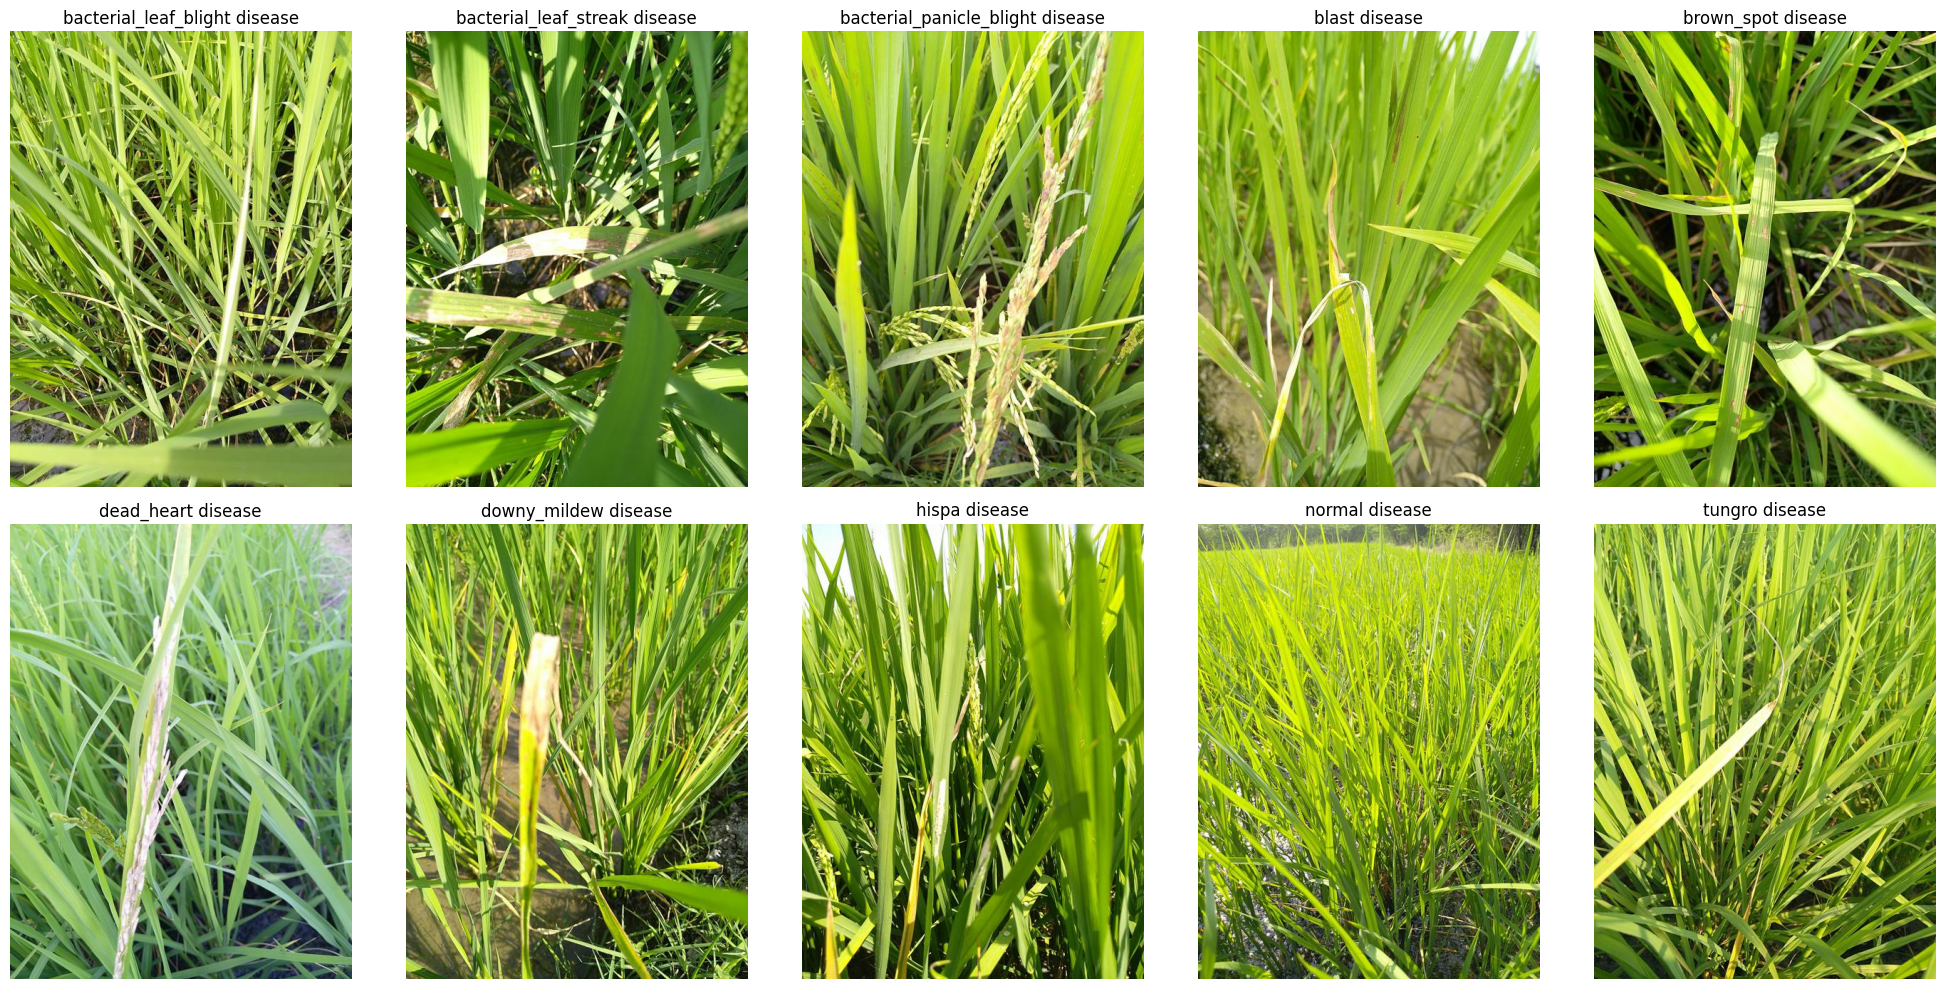

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = ['/content/train_images/bacterial_leaf_blight/100023.jpg',
          '/content/train_images/bacterial_leaf_streak/100042.jpg',
          '/content/train_images/bacterial_panicle_blight/100068.jpg',
          '/content/train_images/blast/100039.jpg',
          '/content/train_images/brown_spot/100022.jpg',
          '/content/train_images/dead_heart/100047.jpg',
          '/content/train_images/downy_mildew/100031.jpg',
          '/content/train_images/hispa/100072.jpg',
          '/content/train_images/normal/100053.jpg',
          '/content/train_images/tungro/100057.jpg']

diseases = ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight',
            'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']

# Append 'disease' to each disease name
diseases = [disease + ' disease' for disease in diseases]

# Plot the images
plt.figure(figsize=(20,10))
for i in range(len(images)):
    plt.subplot(2, 5, i+1)
    img = mpimg.imread(images[i])
    plt.imshow(img)
    plt.title(diseases[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [40]:
# Encode both label and variety column
le = LabelEncoder()
train_df['label'] = le.fit_transform(train_df['label'])
train_df['variety'] = le.fit_transform(train_df['variety'])
train_df.head()

image_id  label  variety  age
0  100330.jpg      0        0   45
1  100365.jpg      0        0   45
2  100382.jpg      0        0   45
3  100632.jpg      0        0   45
4  101918.jpg      0        0   45

In [41]:
# Define the parameters
batch_size = 16
img_height = 224
img_width = 224


In [42]:
# Train the dataset from path of train_images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/train_images',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [43]:
# Validation data set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/train_images',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [44]:
# Classes names from train images dataset
class_names = train_ds.class_names
class_names


['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [45]:
# check the images shape from the dataset
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(16, 224, 224, 3)
(16,)


In [47]:
# Normalize the dataset
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [50]:
# Now check the shape after normalization
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break



(16, 224, 224, 3)
(16,)


In [51]:
# Check the num classes
num_classes = len(class_names)
num_classes


10

In [52]:
# Build the model
input_layer = keras.Input(shape=(224,224,3))

model = tf.keras.Sequential([
    input_layer,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_ds, validation_data=val_ds, epochs=5, verbose=1)




Epoch 1/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 768s 1s/step - accuracy: 0.1648 - loss: 2.1942 - val_accuracy: 0.1519 - val_loss: 2.1472
Epoch 2/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 789s 1s/step - accuracy: 0.1524 - loss: 2.1757 - val_accuracy: 0.1519 - val_loss: 2.1443
Epoch 3/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 784s 2s/step - accuracy: 0.1570 - loss: 2.1710 - val_accuracy: 0.1519 - val_loss: 2.1455
Epoch 4/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 761s 1s/step - accuracy: 0.1603 - loss: 2.1702 - val_accuracy: 0.1519 - val_loss: 2.1439
Epoch 5/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 740s 1s/step - accuracy: 0.1624 - loss: 2.1702 - val_accuracy: 0.1754 - val_loss: 2.1428


In [53]:
# Save the model
model.save('rice_disease_model.h5')


131/131 ━━━━━━━━━━━━━━━━━━━━ 54s 407ms/step


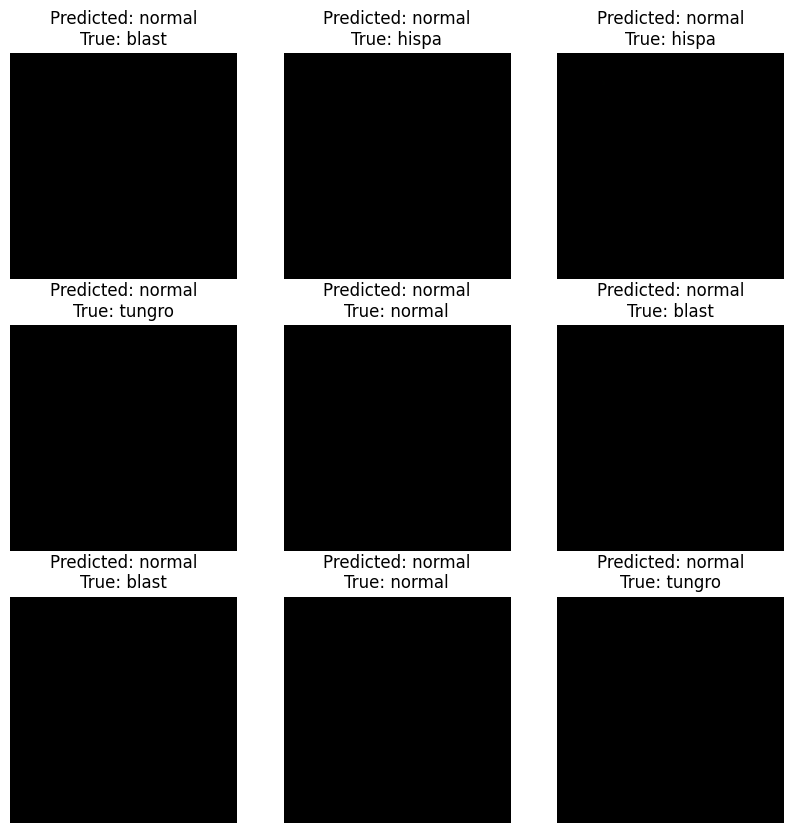

In [55]:
# Predict the model on the new dataset
predictions= model.predict(val_ds)
predictions

# Check the model prediction on the unseen data
predictions[0]

# plot
plt.figure(figsize=(10,10))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i]
        plt.title(f"Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}")
        plt.axis("off")
plt.show()



## Observations:
1. We have 10407 images in Train Data
2. We have 10 Unique Classes of Rice disease
3. We have 10 Varieties of Rice in the dataset
4. We have rice plants age ranging from 45 - 85 Days
5. ADT45 have more value count inside the variety equal to 7000

